# Trainning Isolation Forest on specific dataset sizes
* Dataset       : KDDCUP99 100%
* Subset        : SF
* Total size    : 703066 
* Features      : ["duration", "service", "src_bytes", "dst_bytes"]
* Key attribute : logged_in = True

In [ ]:
from imports import *

In [2]:
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
import time

# Configuration 1

In [3]:
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]
print(f"{df.columns}")
print(np.array(df.head(1)))

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')
[[0 'tcp' 'http' 'SF' 162 4528 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 1 1 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 'normal.']]


In [4]:
scoring = {'AUC': 'roc_auc',
           'Precision': make_scorer(precision_score, pos_label=1), 
           'Recall': make_scorer(recall_score, pos_label=-1),
           'F1': make_scorer(f1_score, average='weighted')}

## Configuration 1
* frac = 0.1
* random_state = 1
* IF random_state = 1

In [5]:
dfsf = df[df["logged_in"]== 1]
print(len(dfsf)- len(dfsf.loc[dfsf["target"]=='normal.']))
dfsf = dfsf[sf_columns + ["target"]] 
# print(dfsf.head(1))
# Split the dataset into 2 classes for consistent anomaly_rate when sampling
dfsf_normal = dfsf.loc[dfsf["target"]=='normal.']
dfsf_attack = dfsf.loc[dfsf["target"]!='normal.']
# print(f"A sample normal frame: \t {dfsf_normal.head(1)}")
# print("-----------------")
# print(f"A sample attack frame: \t {dfsf_attack.head(1)}")


3377


In [6]:
frac = 0.1

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 1).append(dfsf_attack.sample(frac = frac, random_state = 1))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=1)
gs_if_1 = GridSearchCV(IsolationForest(random_state = 1, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [1000], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_1.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_1 = gs_if_1.cv_results_

anomaly rate is 0.5% out of 70307 records
Time for IF fitting: 1064.684


In [7]:
frac = 0.2

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 2).append(dfsf_attack.sample(frac = frac, random_state = 2))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=2)
gs_if_2 = GridSearchCV(IsolationForest(random_state = 2, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [1000], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_2.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_2 = gs_if_2.cv_results_

anomaly rate is 0.5% out of 140613 records
Time for IF fitting: 2132.449


In [8]:
frac = 0.5

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 3).append(dfsf_attack.sample(frac = frac, random_state = 3))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=3)
gs_if_3 = GridSearchCV(IsolationForest(random_state = 3, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [500], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_3.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_3 = gs_if_3.cv_results_

anomaly rate is 0.5% out of 351532 records
Time for IF fitting: 2446.678


In [12]:
frac = 1.0

dfsf_frac = dfsf_normal.sample(frac = frac, random_state = 4).append(dfsf_attack.sample(frac = frac, random_state = 4))

anomaly_rate = 1.0 - len(dfsf_frac.loc[dfsf_frac["target"]=='normal.'])/len(dfsf_frac)
print(f"anomaly rate is {anomaly_rate:.1%} out of {len(dfsf_frac)} records")

dfsf_frac['binary_target'] = [1 if x=='normal.' else -1 for x in dfsf_frac["target"]]
toDecode = toDecodeSF
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    dfsf_frac[f] = leSF.fit_transform(dfsf_frac[f])
    
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf_frac.drop(["target", 'binary_target'], axis=1), dfsf_frac['binary_target'], test_size=0.25, random_state=4)
gs_if_4 = GridSearchCV(IsolationForest(random_state = 4, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [500], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_4.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_4 = gs_if_4.cv_results_

anomaly rate is 0.5% out of 703066 records
Time for IF fitting: 5901.510


<ipython-input-13-fc3aad0c0375>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


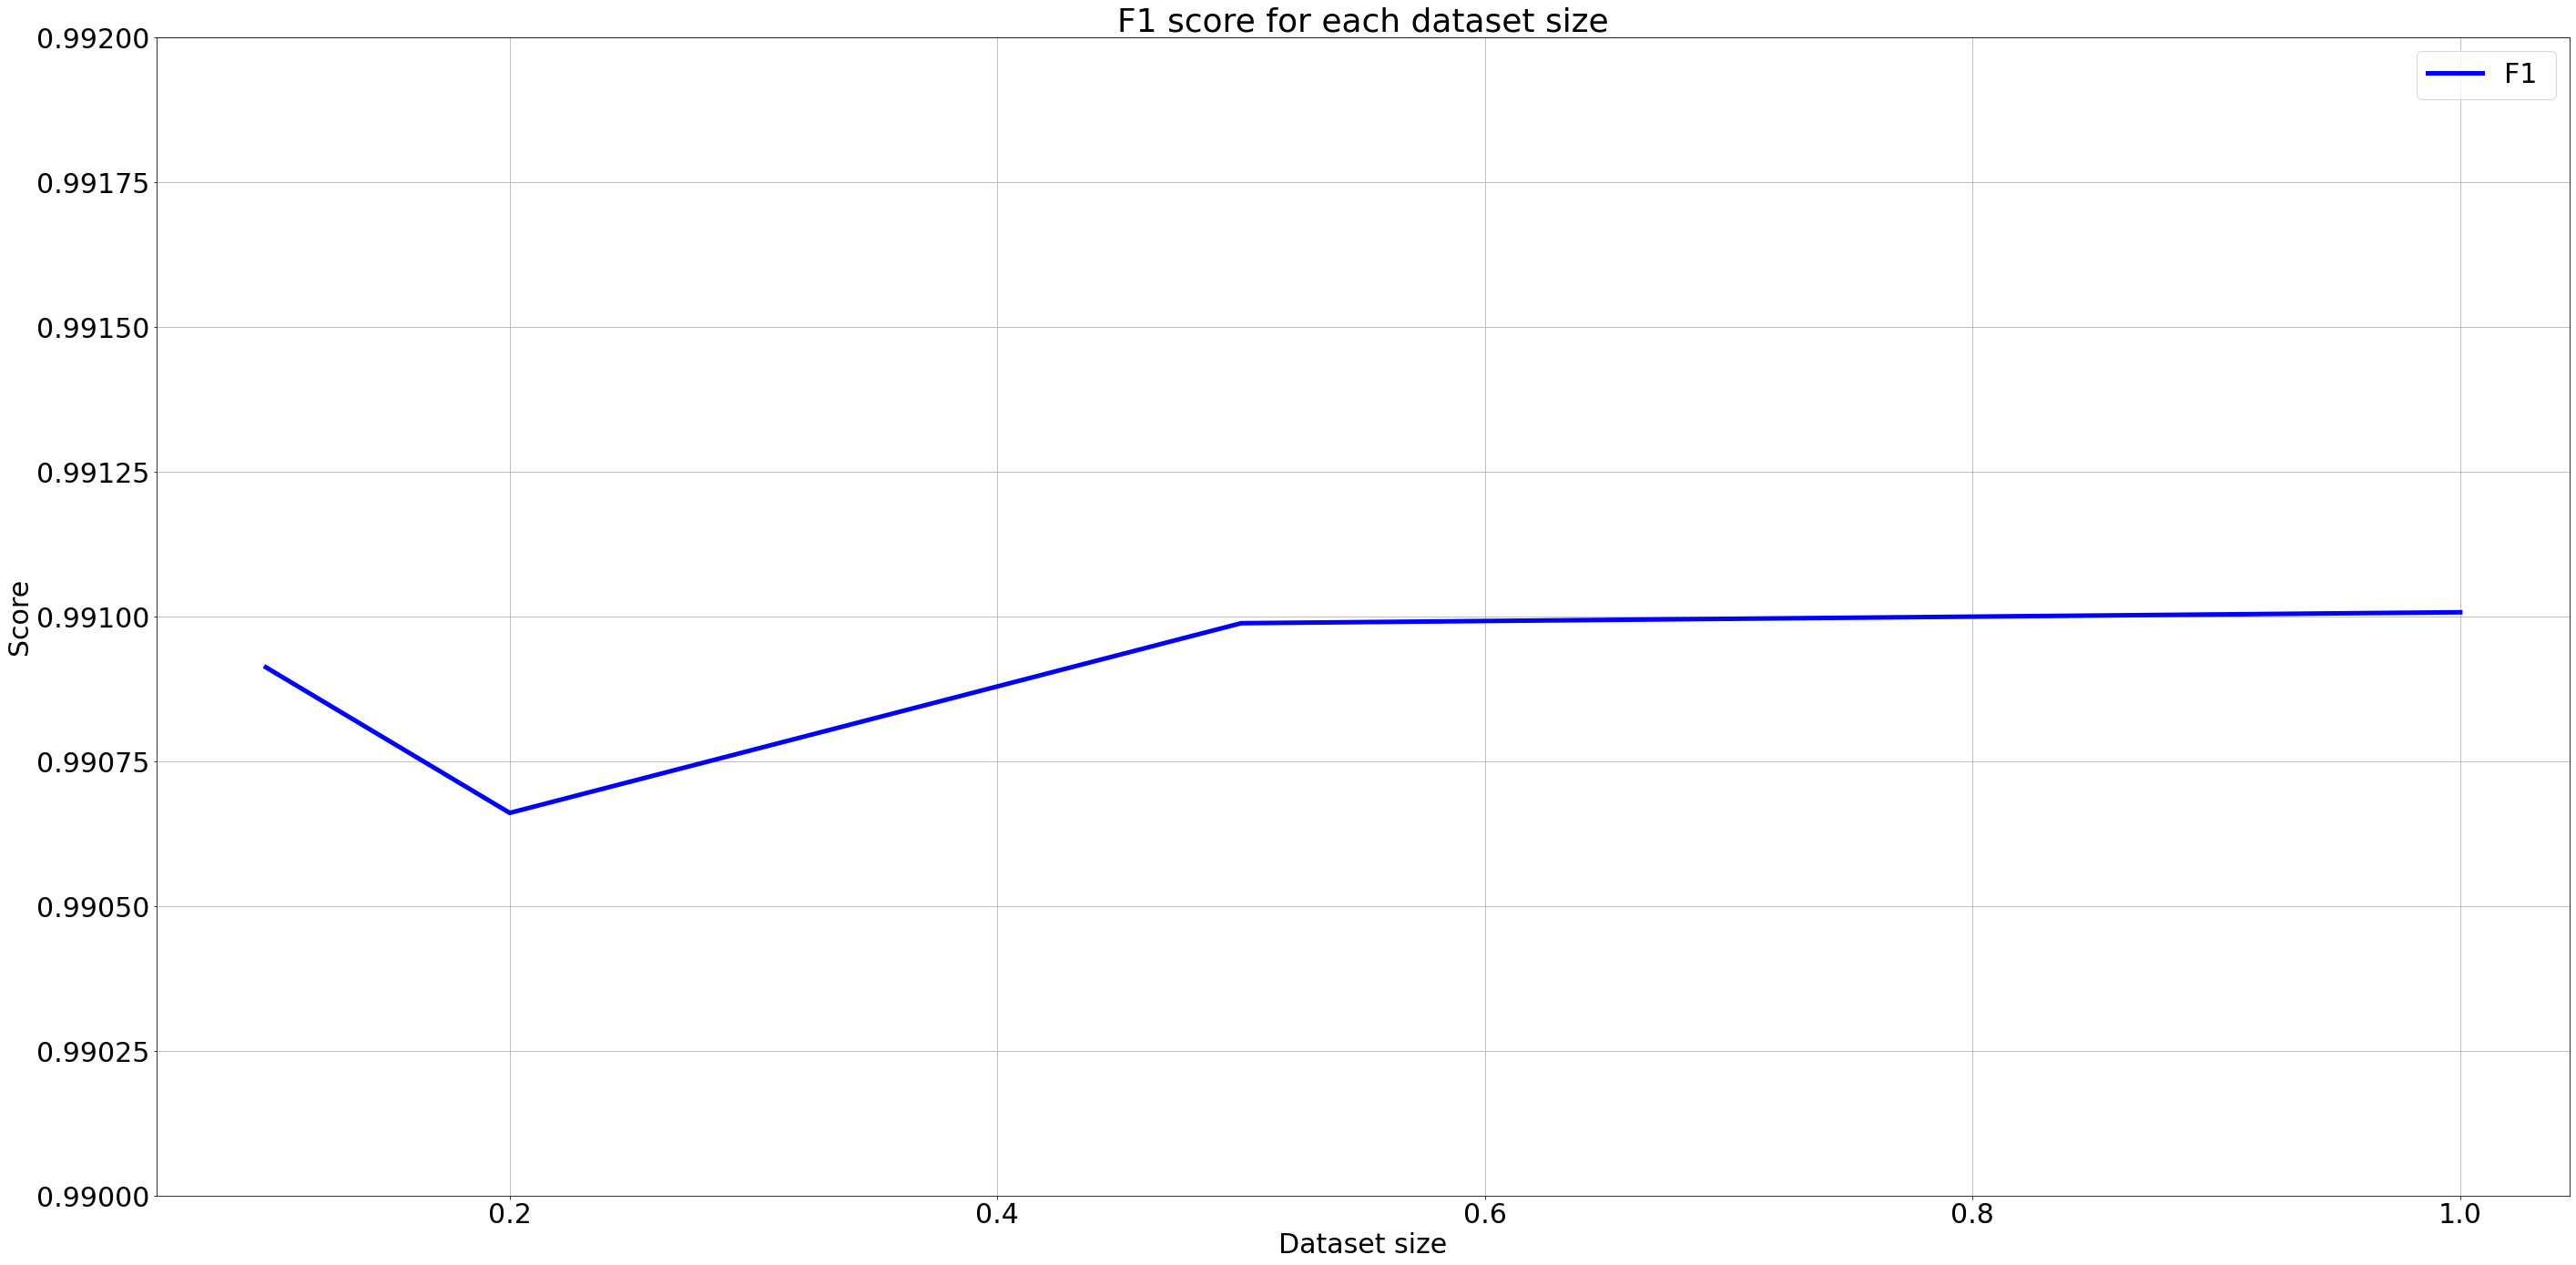

In [13]:
plt.figure(figsize=(40,20))
plt.title('F1 score for each dataset size')
plt.xlabel("Dataset size")
plt.ylabel("Score")
plt.rc('font', size=30)
ax = plt.axes()
ax.set_ylim(0.99, 0.992)
pad = 0.005

labels = np.array([0.1, 0.2, 0.5, 1.0])

colors = {'1': 'r', '2':'b', '3':'c', '4':'y'}
scorer = 'F1'

best_index = np.nonzero(results_if_1['rank_test_%s' % scorer] == 1)[0][0]
best_score_1 = results_if_1['mean_test_%s' % scorer][best_index]
best_param_1 = results_if_1['params'][best_index]

best_index = np.nonzero(results_if_2['rank_test_%s' % scorer] == 1)[0][0]
best_score_2 = results_if_2['mean_test_%s' % scorer][best_index]
best_param_2 = results_if_2['params'][best_index]

best_index = np.nonzero(results_if_3['rank_test_%s' % scorer] == 1)[0][0]
best_score_3 = results_if_3['mean_test_%s' % scorer][best_index]
best_param_3 = results_if_3['params'][best_index]

best_index = np.nonzero(results_if_4['rank_test_%s' % scorer] == 1)[0][0]
best_score_4 = results_if_4['mean_test_%s' % scorer][best_index]
best_param_4 = results_if_4['params'][best_index]

Y_axis = np.array([best_score_1, best_score_2, best_score_3, best_score_4])
# 
X_axis = np.array(labels)

ax.plot(X_axis, Y_axis, '-', color=colors['2'],label="%s " % (scorer), linewidth=5)
plt.legend(loc="best")
plt.grid('off')
plt.tight_layout()
plt.savefig("IF_graph_dataset_size.png", dpi=100)

plt.show()

# Comparison against default values

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=1)
param = best_param_1
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 1).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 1).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=2)
param = best_param_2
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=3)
param = best_param_3
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 3).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 3).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=4)
param = best_param_4
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 4).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(f"---{f1_score(y_test_sf, y_pred)}")
y_pred = IsolationForest(n_jobs = -1, random_state = 4).fit(x_train_sf).predict(x_test_sf)
print(f"---{f1_score(y_test_sf, y_pred)}")

In [ ]:
fig, ax = plt.subplots(figsize = (30,20))
plt.rc('font', size=30)

f1_tuned = [0.9954178136425095, 0.9952542140292294, 0.9953171367636211, 0.9952334249285871]
f1_default = [0.9615918309257809, 0.955213461022107, 0.9576507857113085, 0.9571646010002174]
width = 1
labels = [f"contamination: {best_param_1['contamination']}\nmax_samples: {best_param_1['max_samples']}\nn_estimators: {best_param_1['n_estimators']}", 
          f"contamination: {best_param_2['contamination']}\nmax_samples: {best_param_2['max_samples']}\nn_estimators: {best_param_2['n_estimators']}", 
          f"contamination: {best_param_3['contamination']}\nmax_samples: {best_param_3['max_samples']}\nn_estimators: {best_param_3['n_estimators']}", 
          f"contamination: {best_param_4['contamination']}\nmax_samples: {best_param_4['max_samples']}\nn_estimators: {best_param_4['n_estimators']}"]
ax.set_xticks([i*5 + width/2 for i in range(len(f1_tuned))])
ax.set_xticklabels(labels)
ax.set_ylabel('F1-score')

ax.legend(['f1 score tuned', 'f1 score not tuned'])
ax.set_title('f1 score before and after parameter tuning using cross validation search')

ax.bar([i*5 for i in range(len(f1_tuned))], f1_tuned, width=width)
ax.bar([i*5 + width for i in range(len(f1_tuned))], f1_default, width=width)
fig.tight_layout()
ax.legend()
plt.show()

# Archive

### Configuration 1

In [22]:
results_if_1

{'mean_fit_time': array([12.8687125 , 11.92321833, 11.83350293, 11.96472224, 11.90649072,
        11.81943989, 12.11054571, 11.96175249, 11.7296718 , 12.61882043,
        12.9819204 , 12.29640683, 12.38362058, 11.94079955, 12.19693335]),
 'std_fit_time': array([0.56164772, 0.10620015, 0.05889462, 0.16015218, 0.23449056,
        0.2838635 , 0.36649184, 0.26265151, 0.34700901, 0.32483116,
        0.27883579, 0.28826823, 0.40875308, 0.22520257, 0.21769408]),
 'mean_score_time': array([11.16618919, 10.80726862, 10.70048062, 10.83713277, 10.76808294,
        10.72212044, 10.89475465, 10.88547937, 10.87786992, 11.88444448,
        11.5001204 , 11.15382751, 11.44303775, 10.73238627, 11.17452168]),
 'std_score_time': array([0.39150727, 0.20609302, 0.20266936, 0.23547509, 0.2166497 ,
        0.27961303, 0.1388056 , 0.28559419, 0.11563014, 0.09762611,
        0.24504991, 0.43056558, 0.31079604, 0.05496746, 0.1461866 ]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

### Configuration 2

In [23]:
results_if_2

{'mean_fit_time': array([23.81737638, 23.54276244, 24.267682  , 24.14979053, 23.42664051,
        23.932362  , 24.49562899, 25.63367407, 24.03727667, 23.89467454,
        24.06178602, 24.5661362 , 24.75192817, 23.95182165, 24.32452623]),
 'std_fit_time': array([0.10183349, 0.18271452, 0.39754533, 0.14790514, 0.17826663,
        0.37281019, 0.67234086, 0.40159887, 0.14222028, 0.29349206,
        0.24939598, 0.1247472 , 0.66575852, 0.41460117, 0.07172709]),
 'mean_score_time': array([21.85281555, 22.06613215, 22.40451694, 21.83587233, 22.15761789,
        22.38378723, 22.88541849, 22.86617446, 22.00236917, 22.00897916,
        22.41607745, 22.4287746 , 22.2035164 , 22.56151088, 22.53866394]),
 'std_score_time': array([0.34785561, 0.43551053, 0.117181  , 0.22452905, 0.54435207,
        0.49595343, 0.52496671, 0.55972981, 0.20982739, 0.46376524,
        0.4276049 , 0.25429209, 0.04225872, 0.20777844, 0.29054137]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

In [17]:
param = best_param_2
print(f"tuned parameters: {param}")
stime = time.time()
y_pred = IsolationForest(contamination=param['contamination'], max_samples=param['max_samples'], n_estimators=param['n_estimators'], n_jobs = -1, random_state = 2).fit(x_train_sf).predict(x_test_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
print(classification_report(y_test_sf, y_pred, target_names=["normal", "anomaly"]))

tuned parameters: {'contamination': 0.005, 'max_samples': 0.25, 'n_estimators': 1000}
Time for IF fitting: 307.063
              precision    recall  f1-score   support

      normal       0.06      0.07      0.07       870
     anomaly       1.00      0.99      1.00    174897

    accuracy                           0.99    175767
   macro avg       0.53      0.53      0.53    175767
weighted avg       0.99      0.99      0.99    175767



### Configuration 3

In [24]:
results_if_3

{'mean_fit_time': array([30.28257322, 29.92446224, 30.86247921, 30.63525446, 28.51390092,
        26.55980388, 26.89524857, 26.9994506 , 26.96605635, 26.53106769,
        26.6363469 , 26.95608711, 26.86767411, 26.46747518, 26.54506628]),
 'std_fit_time': array([0.47855092, 0.71776731, 0.20713156, 1.08000496, 1.71264144,
        0.12616408, 0.76828325, 0.5649669 , 0.61128935, 0.19679529,
        0.50762674, 0.31086446, 0.83831555, 0.324673  , 0.2502925 ]),
 'mean_score_time': array([28.25537086, 27.95209225, 28.71735811, 28.87151941, 24.61553081,
        24.23223853, 24.41061974, 24.2653629 , 24.46736185, 24.58708517,
        25.13847327, 24.59504326, 25.07405233, 24.31069048, 24.17915527]),
 'std_score_time': array([0.15561531, 0.45089303, 1.1813023 , 0.98006968, 0.63147611,
        0.13212752, 0.25910473, 0.06408045, 0.16372968, 0.45688757,
        0.59634037, 0.50859952, 0.36788149, 0.31285136, 0.54701402]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

### Configuration 4

In [25]:
results_if_4

{'mean_fit_time': array([70.23992483, 67.90861177, 65.43881909, 65.05286455, 66.94973048,
        68.16033602, 66.43497578, 64.32121642, 66.0939122 , 66.34490164,
        68.61725847, 68.95048118, 67.39072363, 66.83609207, 69.55808671]),
 'std_fit_time': array([0.94060789, 0.80788331, 1.18959946, 0.60387656, 2.18537927,
        1.47060625, 1.60429337, 1.42061277, 1.89506566, 2.92397031,
        1.23042945, 1.91888438, 0.49489993, 0.64739161, 1.30551397]),
 'mean_score_time': array([62.41566586, 61.32064899, 60.82845966, 59.30591559, 61.91655755,
        60.97704887, 60.05648279, 58.72743265, 59.53774873, 61.3185068 ,
        63.25760325, 61.55596654, 61.31900859, 61.78304323, 64.45723168]),
 'std_score_time': array([1.08702264, 0.60437604, 1.25866435, 0.71035583, 1.42137346,
        0.80827911, 1.08538385, 0.90992444, 1.02887821, 1.83509434,
        0.33516665, 1.25933365, 0.22724092, 0.52785709, 0.79348298]),
 'param_contamination': masked_array(data=[0.005, 0.006, 0.007, 0.008, 0.009

In [ ]:
x_train_sf, x_test_sf, y_train_sf, y_test_sf = train_test_split(dfsf.drop(["target", 'binary_target'], axis=1), dfsf['binary_target'], test_size=0.25, random_state=1)
gs_if_1 = GridSearchCV(IsolationForest(random_state = 1, n_jobs = -1),
                       param_grid={'contamination': np.arange(0.005, 0.02, 0.001), 'n_estimators': [100], 'max_samples': [0.25]},
                       scoring=scoring, refit='F1', cv=3)
stime = time.time()
gs_if_1.fit(x_train_sf, y_train_sf)
print("Time for IF fitting: %.3f" % (time.time() - stime))
results_if_1 = gs_if_1.cv_results_